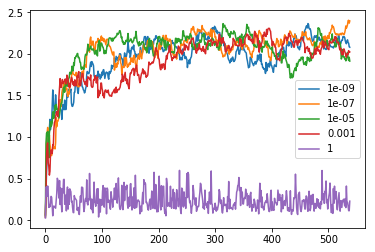

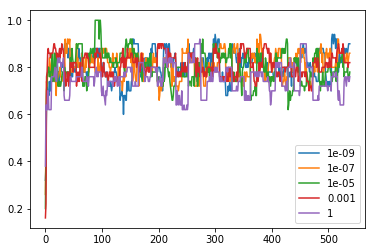

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

def gamma(a, b, x):
    return np.dot(a.T, x) + b

def take_accur(data, label, a, b):
    acc = 0
    for i in range(len(data)):
        ans = gamma(a, b, data[i])
        if (ans > 0 and label[i] == 1) or ( ans < 0 and label[i] == -1):
            acc += 1
    return acc / len(data)

def sgd(data, label, weight):
    a, b = np.zeros(data.shape[1]), 1
    epochs, steps = 50, 301
    acc, norm = [], []
    for epoch in range(1, epochs):
        steplen = 1 / (0.1 * epoch + 25)
        x_train, sample_data, y_label, sample_label = train_test_split(data, label, test_size = 50)
        for step in range(steps):
            sample = np.random.choice(x_train.shape[0])

            if (y_label[sample] * gamma(a, b, x_train[sample])) >= 1:
                a = a - steplen * weight * a
            else:
                a = a - steplen * (weight * a - x_train[sample] * y_label[sample])
                b = b + steplen * y_label[sample]
            if (step % 30 == 0):
                acc.append(take_accur(sample_data, sample_label, a, b))
                norm.append(np.sqrt(np.dot(a.T, a)))
    return (a, b, norm, acc)

# take countinous data only
con_idx = [0,2,4,10,11,12]
test = pd.read_csv('test.data', header=None).values[:,con_idx]
source = pd.read_csv('train.data', header=None).values

# scale dataset
dataset = source[:,con_idx]
label = np.array([-1 if x == " <=50K" else 1 for x in source[:,-1]])
dataset_norm = scale(dataset.astype(float))
test_norm = scale(test.astype(float))
train_data, val_data, train_label, val_label = train_test_split(dataset_norm, label, test_size=0.1)

# training and evaluation
a_list, b_list = [], []
lambdas = [1e-9, 1e-7, 1e-5, 1e-3, 1] # learning rate
for lam in lambdas:
    a, b, norm, acc = sgd(train_data, train_label, lam)
    a_list.append(a)
    b_list.append(b)
    plt.figure(1)
    plt.plot(np.array(norm))
    plt.figure(2)
    plt.plot(np.array(acc))

#plot
plt.figure(1)
plt.legend(lambdas)
plt.figure(2)
plt.legend(lambdas)
plt.show()



In [ ]:
ans_list = np.zeros(test.shape[0])
for i in range(test.shape[0]):
    ans_list[i] = gamma(a_list[1], b_list[1], test[i,:])

with open('output.csv', 'wt') as csvfile:
    csvfile.write('Example,Label')
    for i in range(len(ans_list)):
        if(ans_list[i] > 1):
            csvfile.write('\n' + "'%s'" %str(i) + ',' + '>50K')
        else:
            csvfile.write('\n' + "'%s'" %str(i) + ',' + '<=50K')